# import statements

In [2]:
import numpy as np
import pandas as pd
import scipy.io.wavfile as wav
from python_speech_features import mfcc
from tempfile import TemporaryFile
import os
import math
import pickle
import random
import operator
import matplotlib.pyplot as plt
import datetime
import scipy.fftpack
from glob import glob
import librosa

# And the tf and keras framework, thanks to Google
import tensorflow as tf
from tensorflow import keras

In [3]:
classes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

In [4]:
def distance(point1, point2, n):
    """
    Calculate the Euclidean distance between two points.
    point1: list of floats
    point2: list of floats
    n: int, number of dimensions
    """
    distance = 0
    for x in range(n):
        distance += pow((point1[x] - point2[x]), 2)
    return math.sqrt(distance)

In [5]:
def k_nearest(trainset, instance, k):
    """
    Calculates the distance between the specified instance and the k nearest neighbors in the training set.
    trainset: a list of training instances
    instance: the instance to classify
    k: the number of neighbors to consider
    """
    distances = []
    for i in range(len(trainset)):
        dist = np.linalg.norm(np.array(instance) - np.array(trainset[i]))
    distances.sort()
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors


# Loading in features and saving them as a csv file

In [6]:
# Load in the data from the train folder
train_files = glob('train/*')

# Load the audio file using librosa
# y = audio time series
# sr = sampling rate of y
time_series = []
sampling_rates = []
#load the first 10 files
for i in range(0, 799):
    y, sr = librosa.load(train_files[i])
    time_series.append(y)
    sampling_rates.append(sr)


# convert the time series and sampling rates to a pandas dataframe
df = pd.DataFrame({'time_series': time_series})
# save the dataframe to a csv file
df.to_csv('time_series.csv', index=False)

In [7]:
print(type(time_series))
print(type(time_series[0]))

<class 'list'>
<class 'numpy.ndarray'>


# Basic feature extraction

In [8]:
def extract_features(signal_array):
    """
    Extracts fft features and statistical features from the signal.
    signal: pandas series, the audio signal
    returns:
    fft_features: numpy array, the fft features
    mean: float, the mean of the signal
    std: float, the standard deviation of the signal
    max_value: float, the maximum value of the signal
    min_value: float, the minimum value of the signal
    """
    # Convert the dataframe to a numpy array

    # Fast Fourier Transform
    fft_features = abs(scipy.fftpack.fft(signal_array))

    # Statistical features
    mean = np.mean(signal_array)
    std = np.std(signal_array)
    max_value = np.max(signal_array)
    min_value = np.min(signal_array)

    return fft_features, mean, std, max_value, min_value

fft_features = []
means = []
stds = []
max_values = []
min_values = []

for series in time_series:
    fft_feature, mean, std, max_value, min_value = extract_features(series)
    fft_features.append(fft_feature)
    means.append(mean)
    stds.append(std)
    max_values.append(max_value)
    min_values.append(min_value)
    



In [19]:
df = pd.DataFrame({'fft_features': fft_features})
df.to_csv('features/fft_features.csv', index=False)

df = pd.DataFrame({'means': means})
df.to_csv('features/means.csv', index=False)

df = pd.DataFrame({'stds': stds})
df.to_csv('features/stds.csv', index=False)

df = pd.DataFrame({'max_values': max_values})
df.to_csv('features/max_values.csv', index=False)

df = pd.DataFrame({'min_values': min_values})
df.to_csv('features/min_values.csv', index=False)

# Load the data from the csv files

# Plot all the features from features.csv

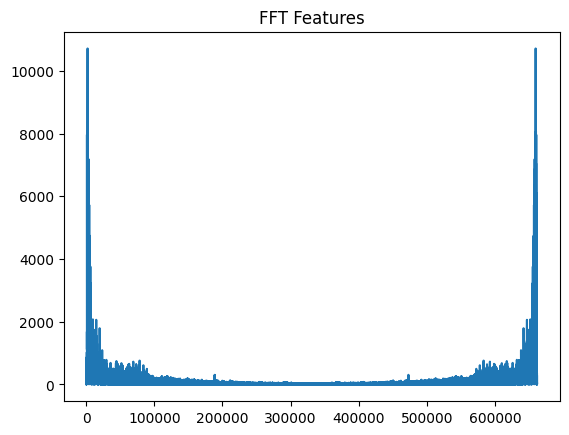

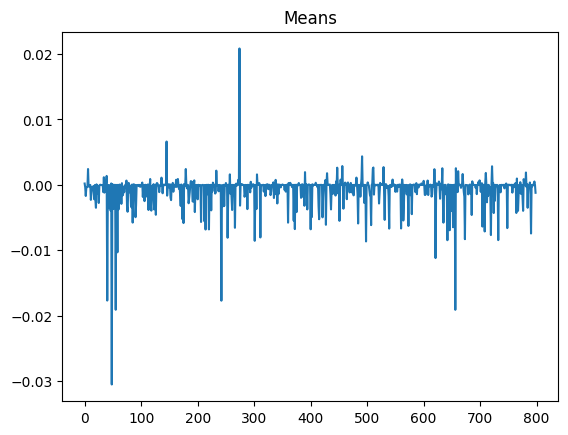

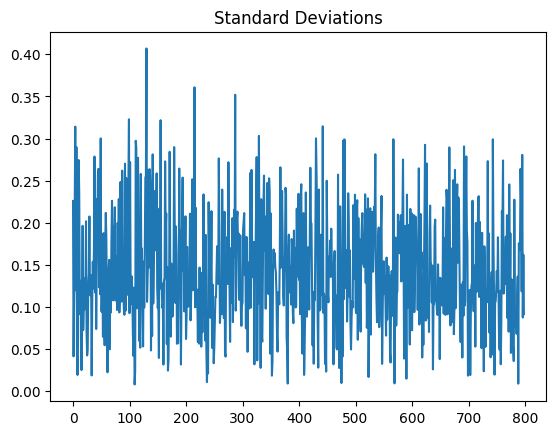

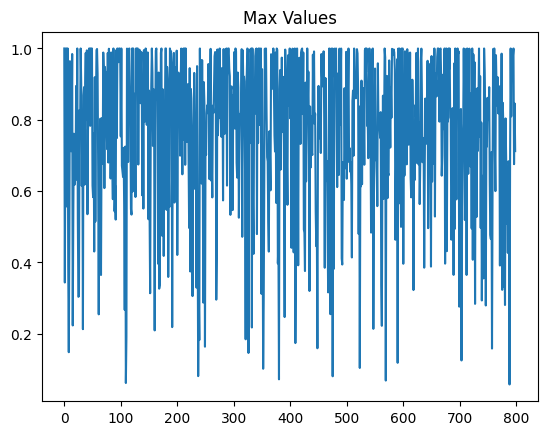

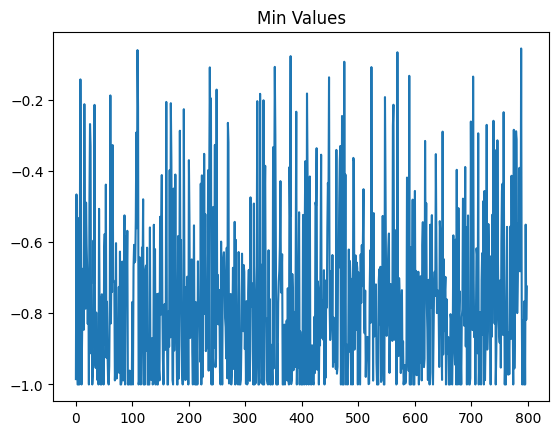

In [9]:
plt.plot(fft_features[0])
plt.title('FFT Features')
plt.show()

plt.plot(means)
plt.title('Means')
plt.show()

plt.plot(stds)
plt.title('Standard Deviations')
plt.show()

plt.plot(max_values)
plt.title('Max Values')
plt.show()

plt.plot(min_values)
plt.title('Min Values')
plt.show()




# Rhythm extraction

In [12]:
def get_rhythm_features(signal_array, sr):
    """
    Extracts rhythm features from the signal.
    signal: pandas series, the audio signal
    sr: int, the sampling rate of the signal
    returns:
    tempo: float, the tempo of the signal
    beats: numpy array, the beats of the signal
    """
    tempo, beats = librosa.beat.beat_track(y = signal_array, sr = sr)
    return tempo, beats

tempos = []
beats = []

for i in range(0, 799):
    tempo, beat = get_rhythm_features(time_series[i], sampling_rates[i])
    tempos.append(tempo)
    beats.append(beat)
print(tempos)
print(beats)

[107.666015625, 161.4990234375, 73.828125, 161.4990234375, 129.19921875, 78.30255681818181, 95.703125, 161.4990234375, 117.45383522727273, 143.5546875, 78.30255681818181, 172.265625, 99.38401442307692, 78.30255681818181, 80.74951171875, 117.45383522727273, 107.666015625, 123.046875, 107.666015625, 161.4990234375, 95.703125, 123.046875, 151.99908088235293, 123.046875, 172.265625, 112.34714673913044, 129.19921875, 123.046875, 161.4990234375, 95.703125, 135.99917763157896, 161.4990234375, 184.5703125, 89.10290948275862, 112.34714673913044, 95.703125, 80.74951171875, 184.5703125, 99.38401442307692, 107.666015625, 117.45383522727273, 123.046875, 103.359375, 161.4990234375, 80.74951171875, 112.34714673913044, 86.1328125, 143.5546875, 107.666015625, 129.19921875, 129.19921875, 123.046875, 143.5546875, 83.35433467741936, 95.703125, 103.359375, 66.25600961538461, 95.703125, 117.45383522727273, 135.99917763157896, 107.666015625, 143.5546875, 135.99917763157896, 129.19921875, 184.5703125, 172.265

In [20]:
df = pd.DataFrame({'tempos' : tempos})
df.to_csv('features/tempos.csv', index = False)

df = pd.DataFrame({'beats' : beats})
df.to_csv('features/beats.csv', index = False)

# Graph the rhythm features

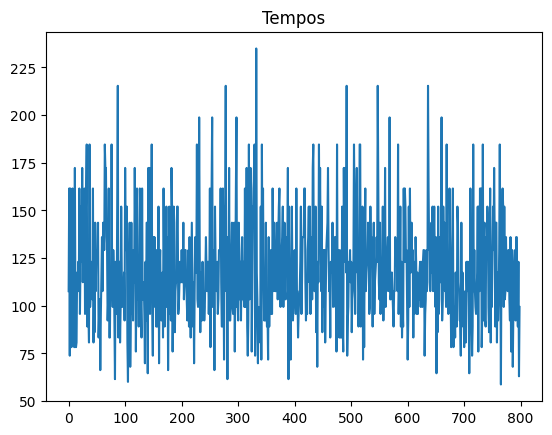

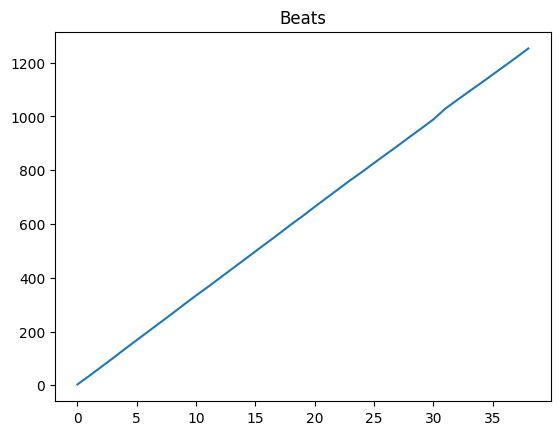

In [16]:
# Graph Tempos
plt.plot(tempos)
plt.title('Tempos')
plt.show()

# Graph Beats
plt.plot(beats[10])
plt.title('Beats')
plt.show()